In [1]:
# import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
%matplotlib inline
import os
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import linear_model
from sklearn.naive_bayes import CategoricalNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

In [2]:
embeddings_test=np.load("/home/alishakhan/notebooks/CubiCasa5k/outputs/embeddings.npy")
Y_test_matrix=np.load("/home/alishakhan/notebooks/CubiCasa5k/outputs/Y.npy")

embeddings_train=np.load("/home/alishakhan/notebooks/CubiCasa5k/outputs/embeddings_train.npy")
Y_train_matrix=np.load("/home/alishakhan/notebooks/CubiCasa5k/outputs/Y_train.npy")

Y_test=Y_test_matrix.argmax(1)
Y_train=Y_train_matrix.argmax(1)

In [27]:
np.unique(Y_train)

array([ 3,  4,  5,  6,  7,  9, 10])

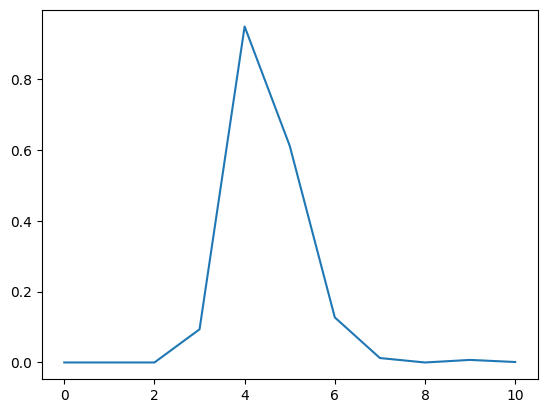

In [29]:
ids=np.where(Y_train==3)
test=embeddings_train[ids]
plt.plot(test.mean(0))

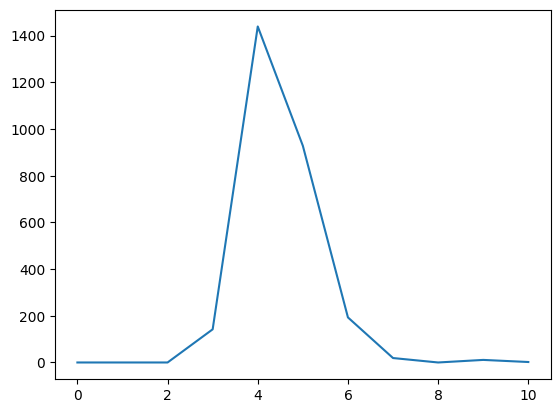

In [30]:
plt.plot(test.sum(0))



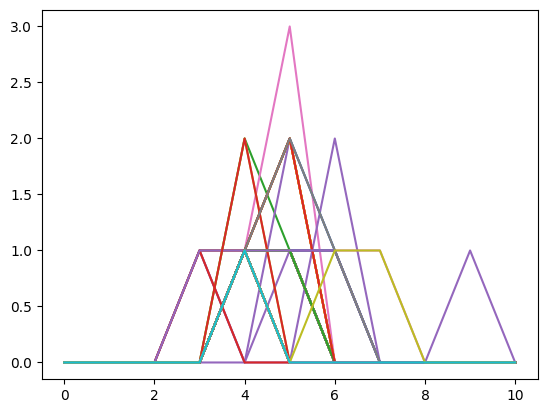

In [31]:
for i in range(min(len(test), 100)):
    plt.plot(test[i])

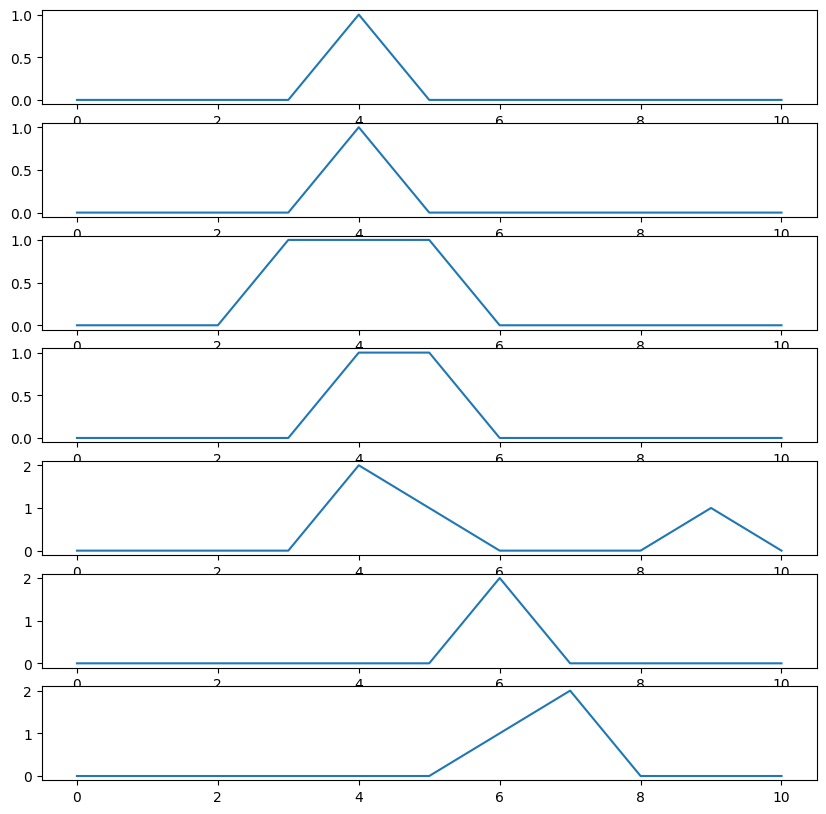

In [36]:

num_classes = len(set(Y_train))
fig,ax=plt.subplots(num_classes, 1, figsize=(10, 10))
for i, c in enumerate(set(Y_train)):
    indices = np.where(Y_train == c)
    ax[i].plot(embeddings_train[c])
plt.show()

# Multiclass Logistic Regression

In [8]:
logr=linear_model.LogisticRegression(max_iter=1000)
logr=logr.fit(embeddings_train, Y_train)

y_pred_logr=logr.predict(embeddings_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_logr)))

Model accuracy score: 0.5127


# Multinomial Naive Bayes

In [9]:
# instantiate the model
mnb = MultinomialNB()

# fit the model
mnb=mnb.fit(embeddings_train, Y_train)

# predict
y_pred=mnb.predict(embeddings_test)

# calculate the accuracy of the model
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))


Model accuracy score: 0.4806


# Decision Tree

In [10]:
clf=DecisionTreeClassifier()
clf=clf.fit(embeddings_train , Y_train)
y_pred_tree=clf.predict(embeddings_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_tree)))

Model accuracy score: 0.5141


#  KNN

In [12]:
scores = []
for n in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn = knn.fit(embeddings_train, Y_train)
    knn_pred = knn.predict(embeddings_test)
    score = accuracy_score(Y_test, knn_pred)
    scores.append(score)

optimal_n = scores.index(max(scores)) + 1
print("The optimal value of n_neighbors is: ", optimal_n)


The optimal value of n_neighbors is:  28


In [16]:
scores[27]

0.5193872666347534